# XEFI
### An example of generating a basic XEFI for a mutlilayer interface.

In [62]:
import XEFI
import kkcalc as kk
import kkcalc.models as kkmodels
import numpy as np
refractive_db = kkmodels.asp_db_complex

In [70]:
PS = kk.stoichiometry("C8H8") # Polystyrene
PS_density = 1.048
refractive_PS = refractive_db(PS, density = PS_density, name="PS")
x = 0.06
PBrxS = kk.stoichiometry(f"C8H{8-x}Br{x}") # polybromostyrene [CH2CH(C6H4Br)]n - brominated polystyrene
PBrxS_density = PS_density + 0.655 * x
refractive_PBrxS = refractive_db(PBrxS, density = PBrxS_density, name="PBrxS")

C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\common.py:402: UserWarning: Setting a formula mass will not be internally used when a `stoichiometry` has been assigned.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1912: UserWarning: When generating `asp_complex`, the energy intervals of real (10.00, 30000.00) and imaginary (10.00, 500000.00) components don't match.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1931: UserWarning: Real energies are a subset of imaginary energies, truncating imaginary energies to match real.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:624: UserWarning: (ASP 'PS'(507 en segments, 5 coefficients.)) Energies have changed length. Coefficients set to `None`.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\mode

In [84]:
dev_poly = 0.15 * PS + 0.85 * PBrxS
display(dev_poly)

stoichiometry([(6, 8.0), (1, 7.949000000000001), (35, 0.051)])

In [ ]:
arr = np.concatenate([refractive_PS.energies, refractive_PBrxS.energies])
unique = []
not_unique = []
for i in range(len(arr)):
    s = sum(arr == arr[i])
    if s > 1:
        not_unique.append(arr[i])
    else:
        unique.append(arr[i])
print("Unique energies:", unique)
print("Not unique energies:", not_unique.__len__())

Unique energies: [np.float64(1549.8), np.float64(1550.0), np.float64(1781.9), np.float64(1782.1), np.float64(13473.6), np.float64(13473.8)]
Not unique energies: 1008


In [73]:
refractive_poly = kkmodels.asp_complex(
    kkmodels.asp_re(refractive_PS.energies, 0.15 * refractive_PS.coefs.real + 0.85 * refractive_PBrxS.coefs.real),
    kkmodels.asp_im(refractive_PS.energies, 0.15 * refractive_PS.coefs.imag + 0.85 * refractive_PBrxS.coefs.imag),
    density = 0.15 * PS_density + 0.85 * PBrxS_density
)

ValueError: operands could not be broadcast together with shapes (503,5) (509,5) 

In [ ]:

refractive_air = 1.0 + 0j
refractive_poly = refractive_db(dev_poly, density = 1.5, name="Poly")
refractive_Au = refractive_db("Au", density = 19.32, name="Au")
refractive_Si = refractive_db("Si", density = 2.329, name="Si")

In [41]:
# Define some system parameters
beam_energy = 16.9e3 # in eV
wav = (XEFI.models.basic.en2wav) / beam_energy  # to Angstroms
print(rf"$\lambda$ = {wav:0.2f} Å")

angles = np.linspace(0.1, 0.8, 3000)  # in degrees

z = [
    0,
    -1000
    -1500,
] # Define the z-coordinates for the multilayer interface

refractive_indicies: list[kkmodels.asp_complex] = [
    refractive_air,
    refractive_poly,
    refractive_Au,
    refractive_Si,
] #  
labels = ["Air"] + [
    ref.name
    for ref in refractive_indicies[1:]
]

$\lambda$ = 0.73 Å


In [42]:
# Check the refractive indexes match the paper at the beam energy
for i, ref in enumerate(refractive_indicies):
    if hasattr(ref, "eval_refractive_index"):
        idx = ref.eval_refractive_index(beam_energy)
        print(f"{labels[i]:<10}: n = 1 - ({1-idx.real}) + ({idx.imag})i")
    else:
        print(f"{labels[i]:<10}: n = {ref}")

Air       : n = (1+0j)
Poly      : n = 1 - (1.1638652239742697e-06) + (3.0529392274070817e-09)i
Au        : n = 1 - (1.0921794489582304e-05) + (1.3287669396566427e-06)i
Si        : n = 1 - (1.6984020519972276e-06) + (9.077657590727372e-09)i


What Dev used is quite off the Henke expectation.
Modify the polybromostyrene density to match refractive index of Dev...

In [61]:
refractive_poly = refractive_db(dev_poly, density = 2.35, name="Poly")
idx = refractive_poly.eval_refractive_index(beam_energy)
print(f"{refractive_poly.name:<10}: n = 1 - ({1-idx.real}) + ({idx.imag})i")

Poly      : n = 1 - (1.8233888509078255e-06) + (4.782938122937763e-09)i


In [43]:
result = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    # z_roughness=[10, 10, 10],
    layer_names=labels,
    method=XEFI.XEF_method.dev
)

AssertionError: Layer names must match the number of layers (N+1).

The Expected Result from Toland for 800 Angstrom, Copper-Kalpha wavelength (~8keV).
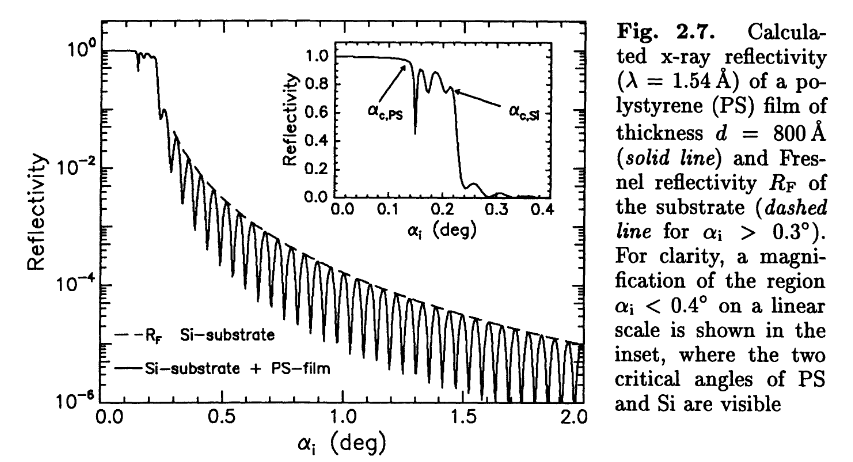

wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [0.00020283+0.01415391j]


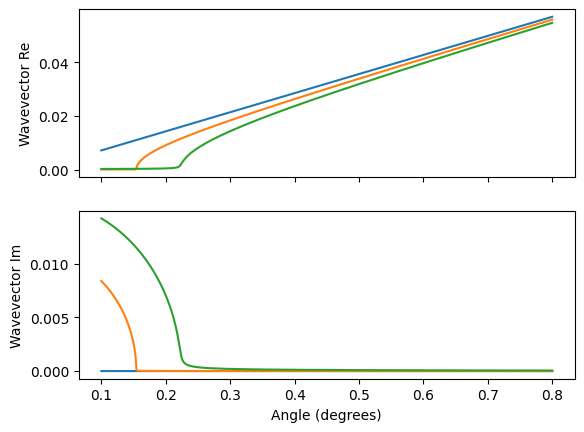

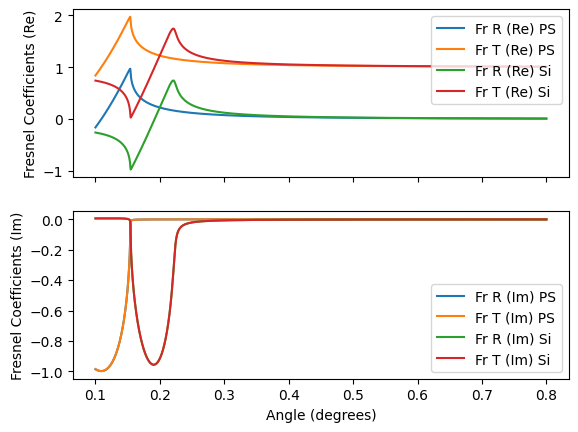

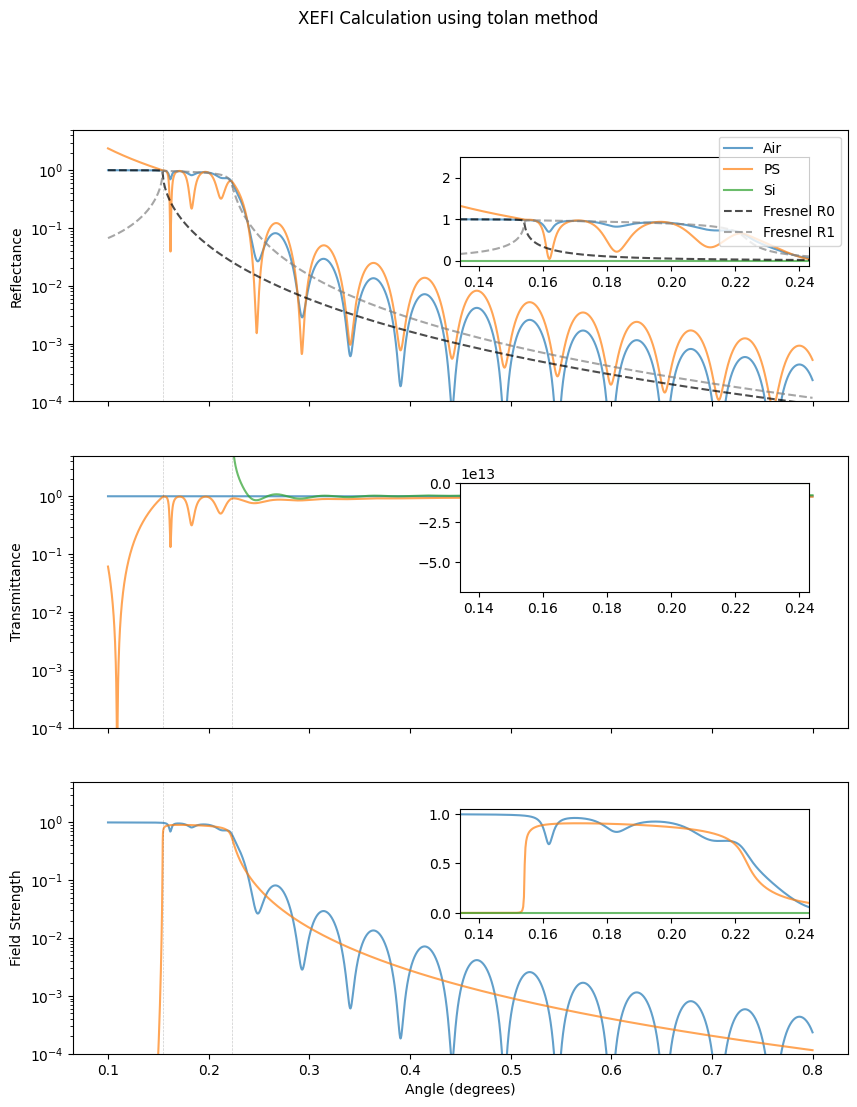

In [5]:
result2 = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    layer_names=labels,
    # method=XEFI.XEF_method.dev
    method=XEFI.XEF_method.tolan
)

wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [0.00020283+0.01415391j]


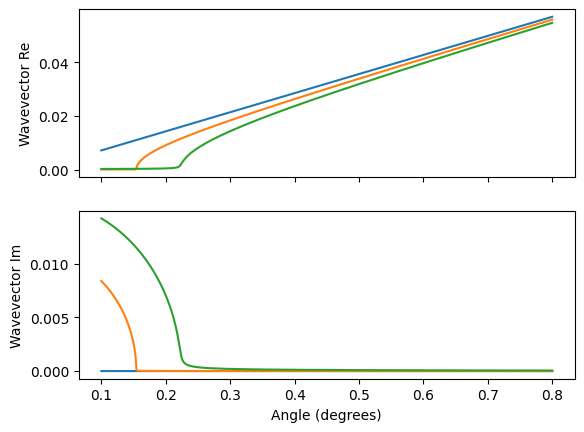

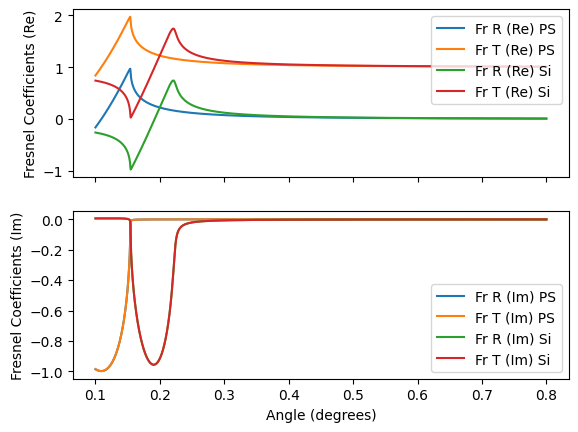

Layer 1: X = [-0.26095398+0.00611857j], 	 a_jp1 = [0.+0.j], 
	 fresnel_r = [-0.26095398+0.00611857j] 	 djp1 = 0
	wave = [0.00020283+0.01415391j]
Layer 0: X = [-0.14011594-0.98893732j], 	 a_jp1 = [0.00131049+1.04249535e-05j], 
	 fresnel_r = [-0.14011506-0.98893745j] 	 djp1 = 800.0
	wave = [9.94352616e-06+0.00829665j]
------
Layer 0: T = [1.+0.j], 	 a_jp1 = [0.00131049+1.04249535e-05j],
	 fresnel_t = [0.85988494-0.98893745j] 	 djp1 = 800.0
Layer 0: R = [-0.14011594-0.98893732j], 	 a_jp1 = [0.00131049+1.04249535e-05j],
	 fresnel_r = [-0.14011506-0.98893745j] 	 djp1 = 800.0
Layer 1: T = [0.85988445-0.98893777j], 	 a_jp1 = [0.],
	 fresnel_t = [0.73904602+0.00611857j] 	 djp1 = 0.0
Layer 1: R = [-3.82145393e-07+4.46243499e-07j], 	 a_jp1 = [0.],
	 fresnel_r = [-0.26095398+0.00611857j] 	 djp1 = 0.0


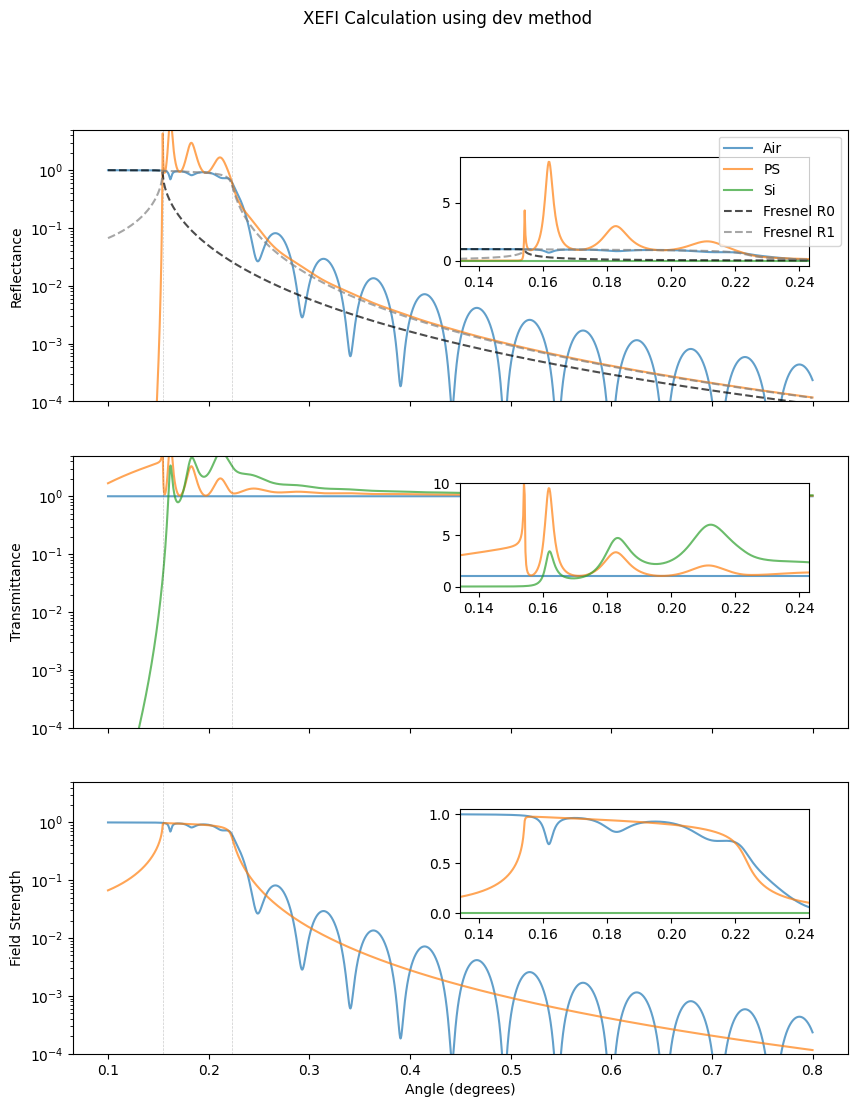

In [6]:
result3 = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    layer_names=labels,
    # method=XEFI.XEF_method.dev
    method=XEFI.XEF_method.dev
)

In [7]:
result.T[500, 1], result.R[500, 1]

(np.complex128(1.9052709515179813-0.3642534365618858j),
 np.complex128(0.43757474305180344-1.6571712281851327j))

In [8]:
result.T[500, 0], result.R[500, 0]

(np.complex128(1.1749942237245898-0.00034060629799150774j),
 np.complex128(0.716011676655272-0.7846100962322315j))

T (3000, 3)
R (3000, 3)
i:  0 
Transmission: [0.83595919-0.98955364j 0.83986864-0.99020178j 0.84378725-0.99083543j ...
 1.0088991 -0.03452455j 1.00889311-0.03453442j 1.00888713-0.03454429j] 
Reflection: [-0.7680508 -2.69610653e-01j -0.77549632-2.66723129e-01j
 -0.78317645-2.63966028e-01j ... -0.00129384+5.71568766e-04j
 -0.00129581+2.82291872e-04j -0.00129008-6.60128871e-06j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.-1.42418427e+00j 0.-1.41563061e+00j 0.-1.40707695e+00j ...
  0.-2.13841481e-02j 0.-1.28304889e-02j 0.-4.27682963e-03j]
 [0.-1.42750847e+00j 0.-1.41893484e+00j 0.-1.41036122e+00j ...
  0.-2.14340611e-02j 0.-1.28604366e-02j 0.-4.28681222e-03j]
 [0.-1.43083267e+00j 0.-1.42223908e+00j 0.-1.41364549e+00j ...
  0.-2.14839740e-02j 0.-1.28903844e-02j 0.-4.29679480e-03j]
 ...
 [0.-1.13864

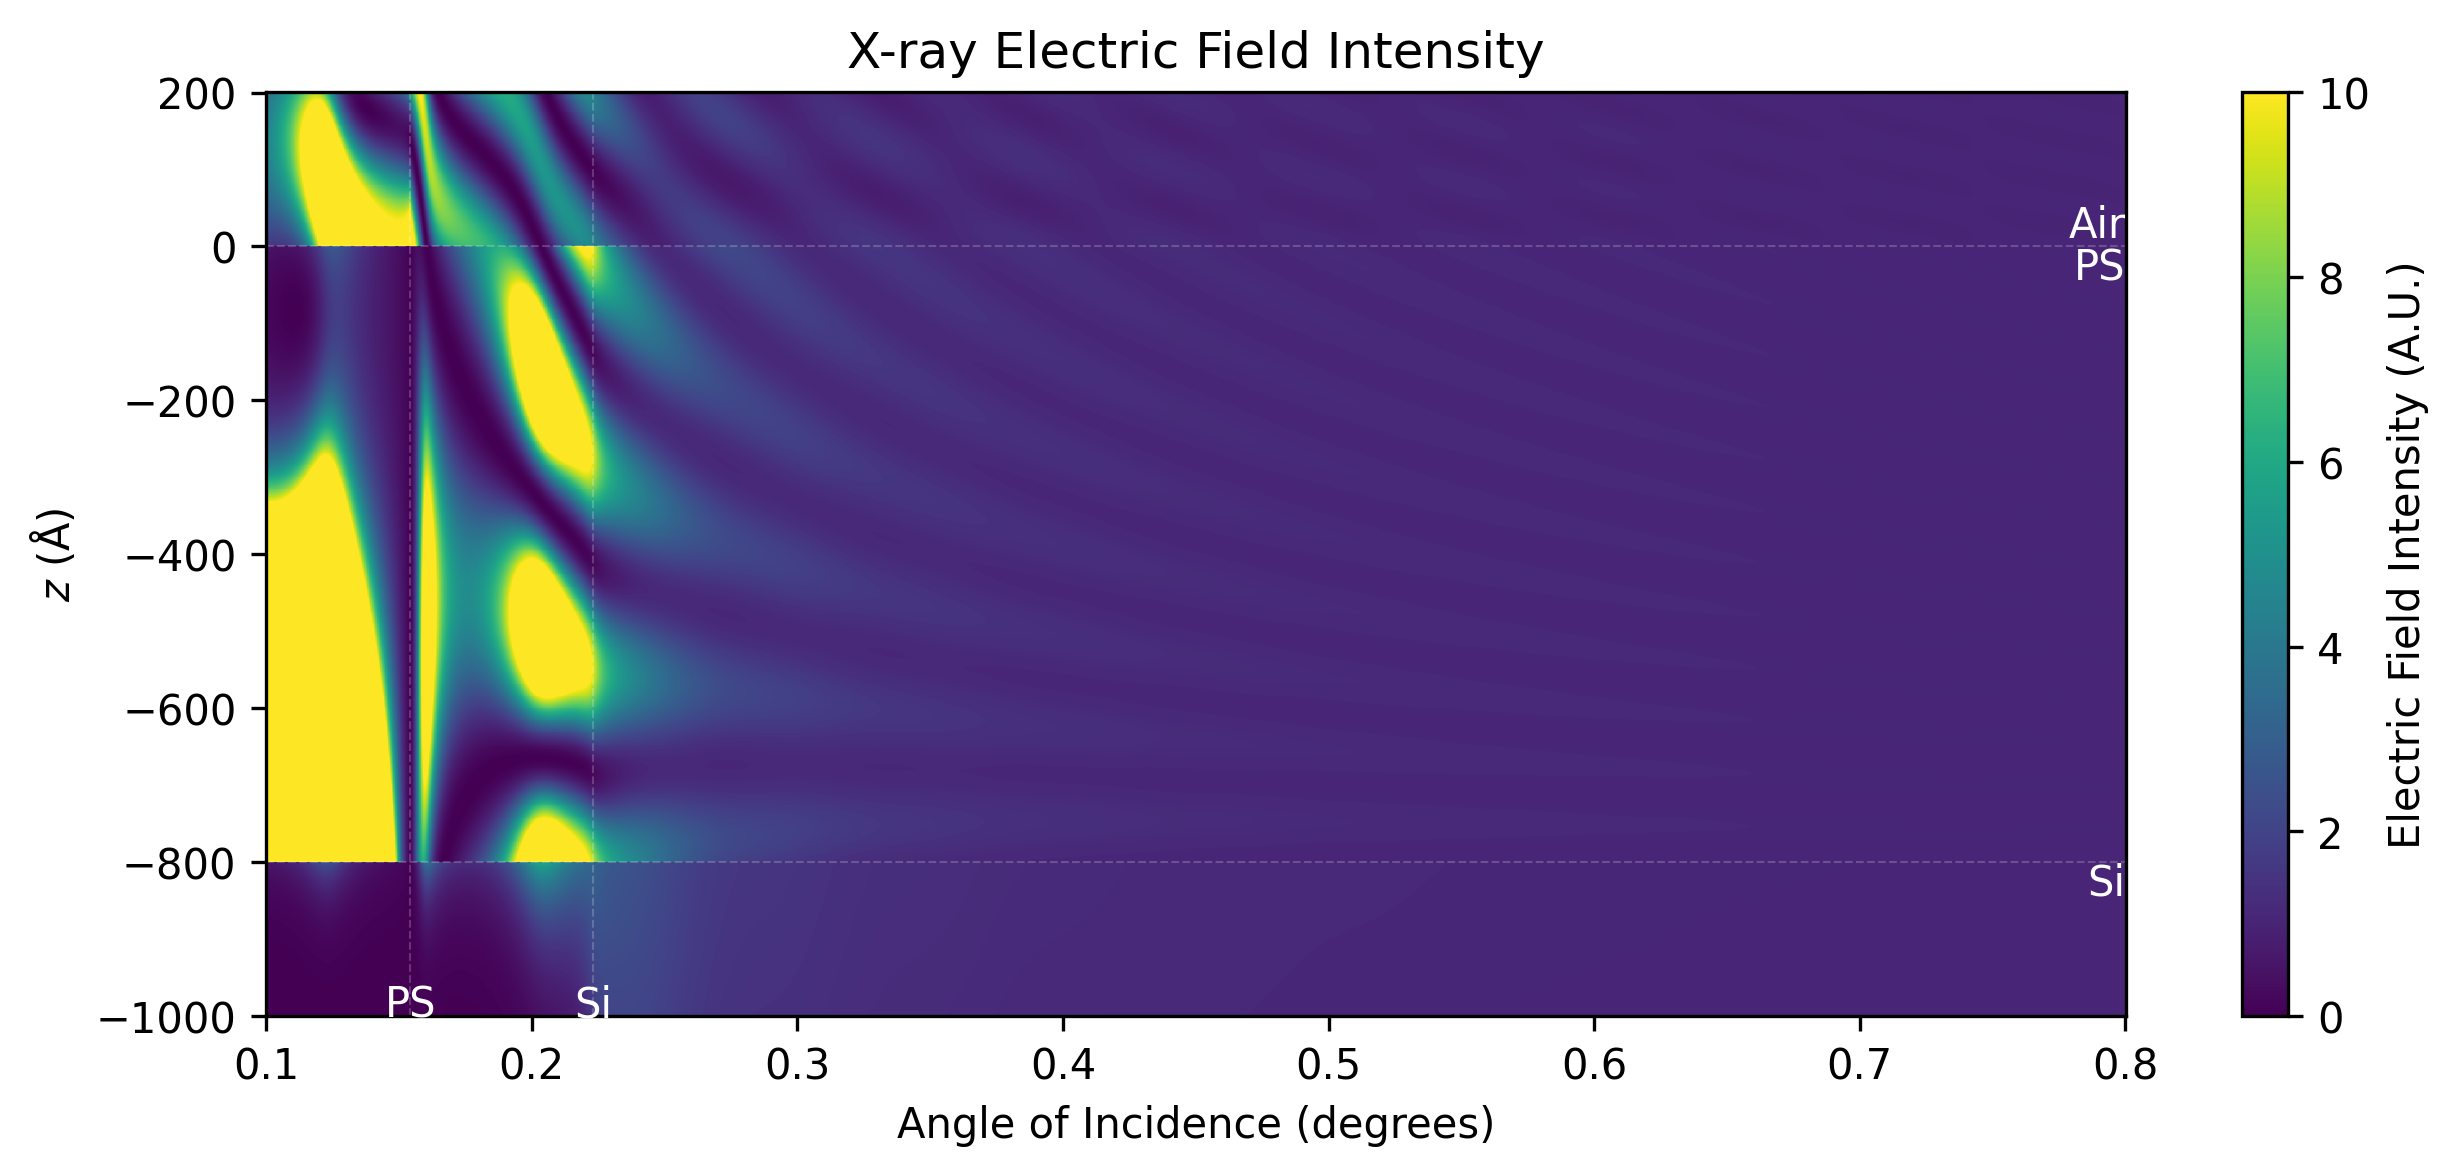

In [9]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig,ax = result.generate_pretty_figure_XEFI(z_vals, norm=norm)

In [10]:
result2.T[500, 1], result2.R[500, 1]

(np.complex128(0.812524080733835-0.12082390030954954j),
 np.complex128(-0.06997840269030721-0.6925276681300638j))

In [11]:
result2.T[500, 0], result2.R[500, 0]

(np.complex128(1+0j), np.complex128(-0.25745432195647233-0.8133515684396133j))

T (3000, 3)
R (3000, 3)
i:  0 
Transmission: [0.99999085-0.00427682j 0.99999081-0.0042868j  0.99999077-0.00429678j ...
 0.99941546-0.03418692j 0.99941512-0.03419689j 0.99941477-0.03420687j] 
Reflection: [-0.15559882-0.98664371j -0.15166432-0.98725142j -0.14772076-0.98784442j
 ...  0.01125515+0.01090681j  0.01096072+0.01094427j
  0.01066557+0.01097387j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.-1.42418427e+00j 0.-1.41563061e+00j 0.-1.40707695e+00j ...
  0.-2.13841481e-02j 0.-1.28304889e-02j 0.-4.27682963e-03j]
 [0.-1.42750847e+00j 0.-1.41893484e+00j 0.-1.41036122e+00j ...
  0.-2.14340611e-02j 0.-1.28604366e-02j 0.-4.28681222e-03j]
 [0.-1.43083267e+00j 0.-1.42223908e+00j 0.-1.41364549e+00j ...
  0.-2.14839740e-02j 0.-1.28903844e-02j 0.-4.29679480e-03j]
 ...
 [0.-1.13864620e+01j 0.-1.13180748e+

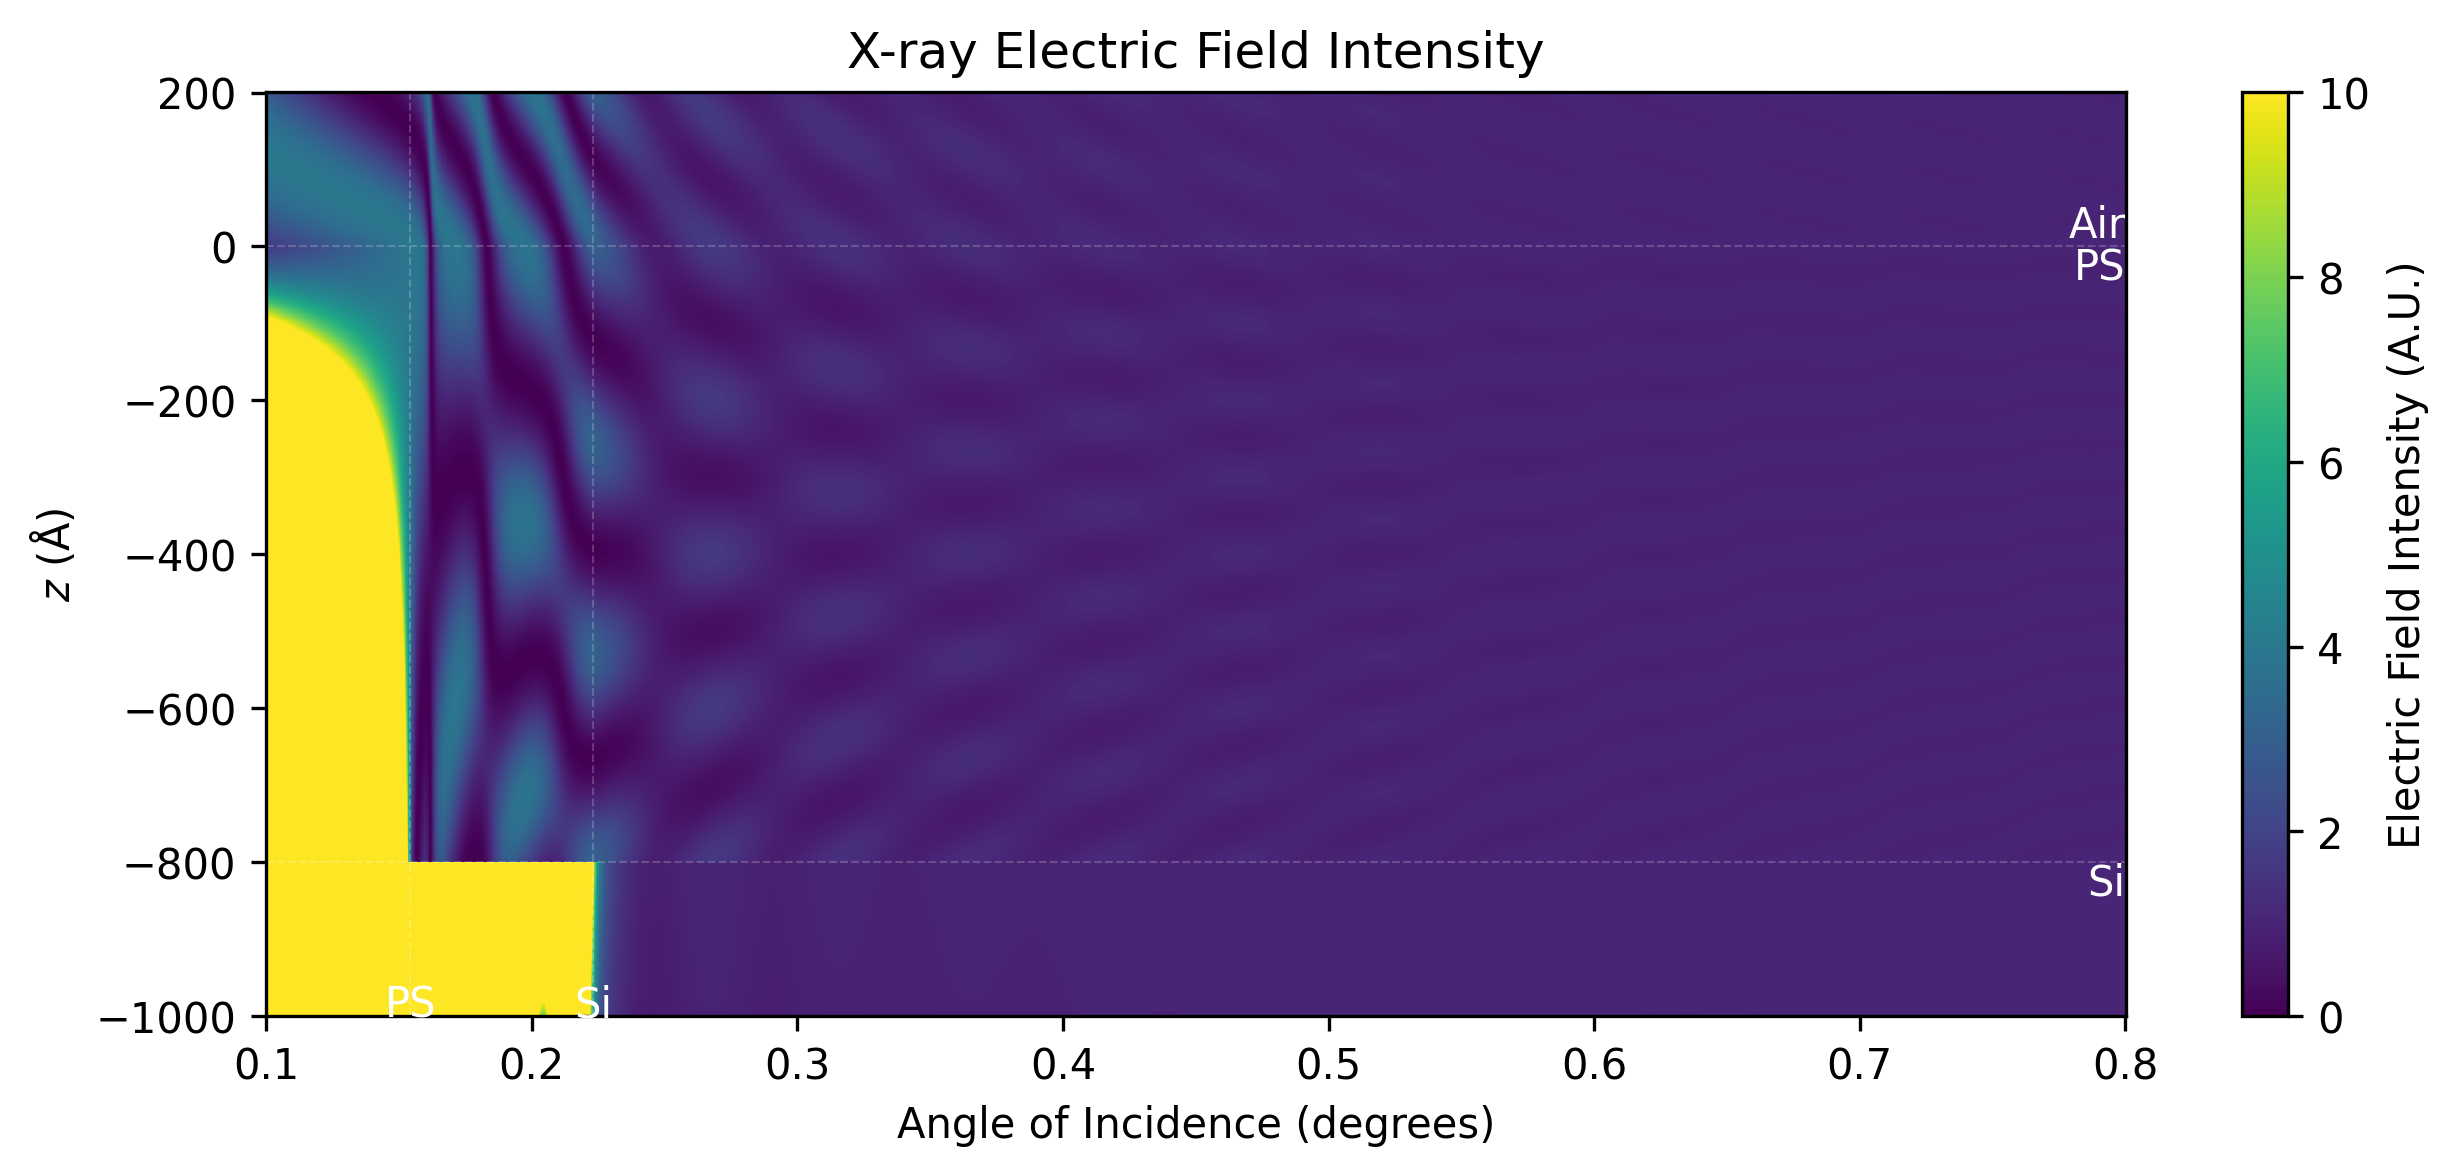

In [12]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig,ax = result2.generate_pretty_figure_XEFI(z_vals, norm=norm)

T (3000, 3)
R (3000, 3)
i:  0 
Transmission: [0.99999085-0.00427682j 0.99999081-0.0042868j  0.99999077-0.00429678j ...
 0.99941546-0.03418692j 0.99941512-0.03419689j 0.99941477-0.03420687j] 
Reflection: [-0.15559882-0.98664371j -0.15166432-0.98725142j -0.14772076-0.98784442j
 ...  0.01125515+0.01090681j  0.01096072+0.01094427j
  0.01066557+0.01097387j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.-1.42418427e+00j 0.-1.41563061e+00j 0.-1.40707695e+00j ...
  0.-2.13841481e-02j 0.-1.28304889e-02j 0.-4.27682963e-03j]
 [0.-1.42750847e+00j 0.-1.41893484e+00j 0.-1.41036122e+00j ...
  0.-2.14340611e-02j 0.-1.28604366e-02j 0.-4.28681222e-03j]
 [0.-1.43083267e+00j 0.-1.42223908e+00j 0.-1.41364549e+00j ...
  0.-2.14839740e-02j 0.-1.28903844e-02j 0.-4.29679480e-03j]
 ...
 [0.-1.13864620e+01j 0.-1.13180748e+

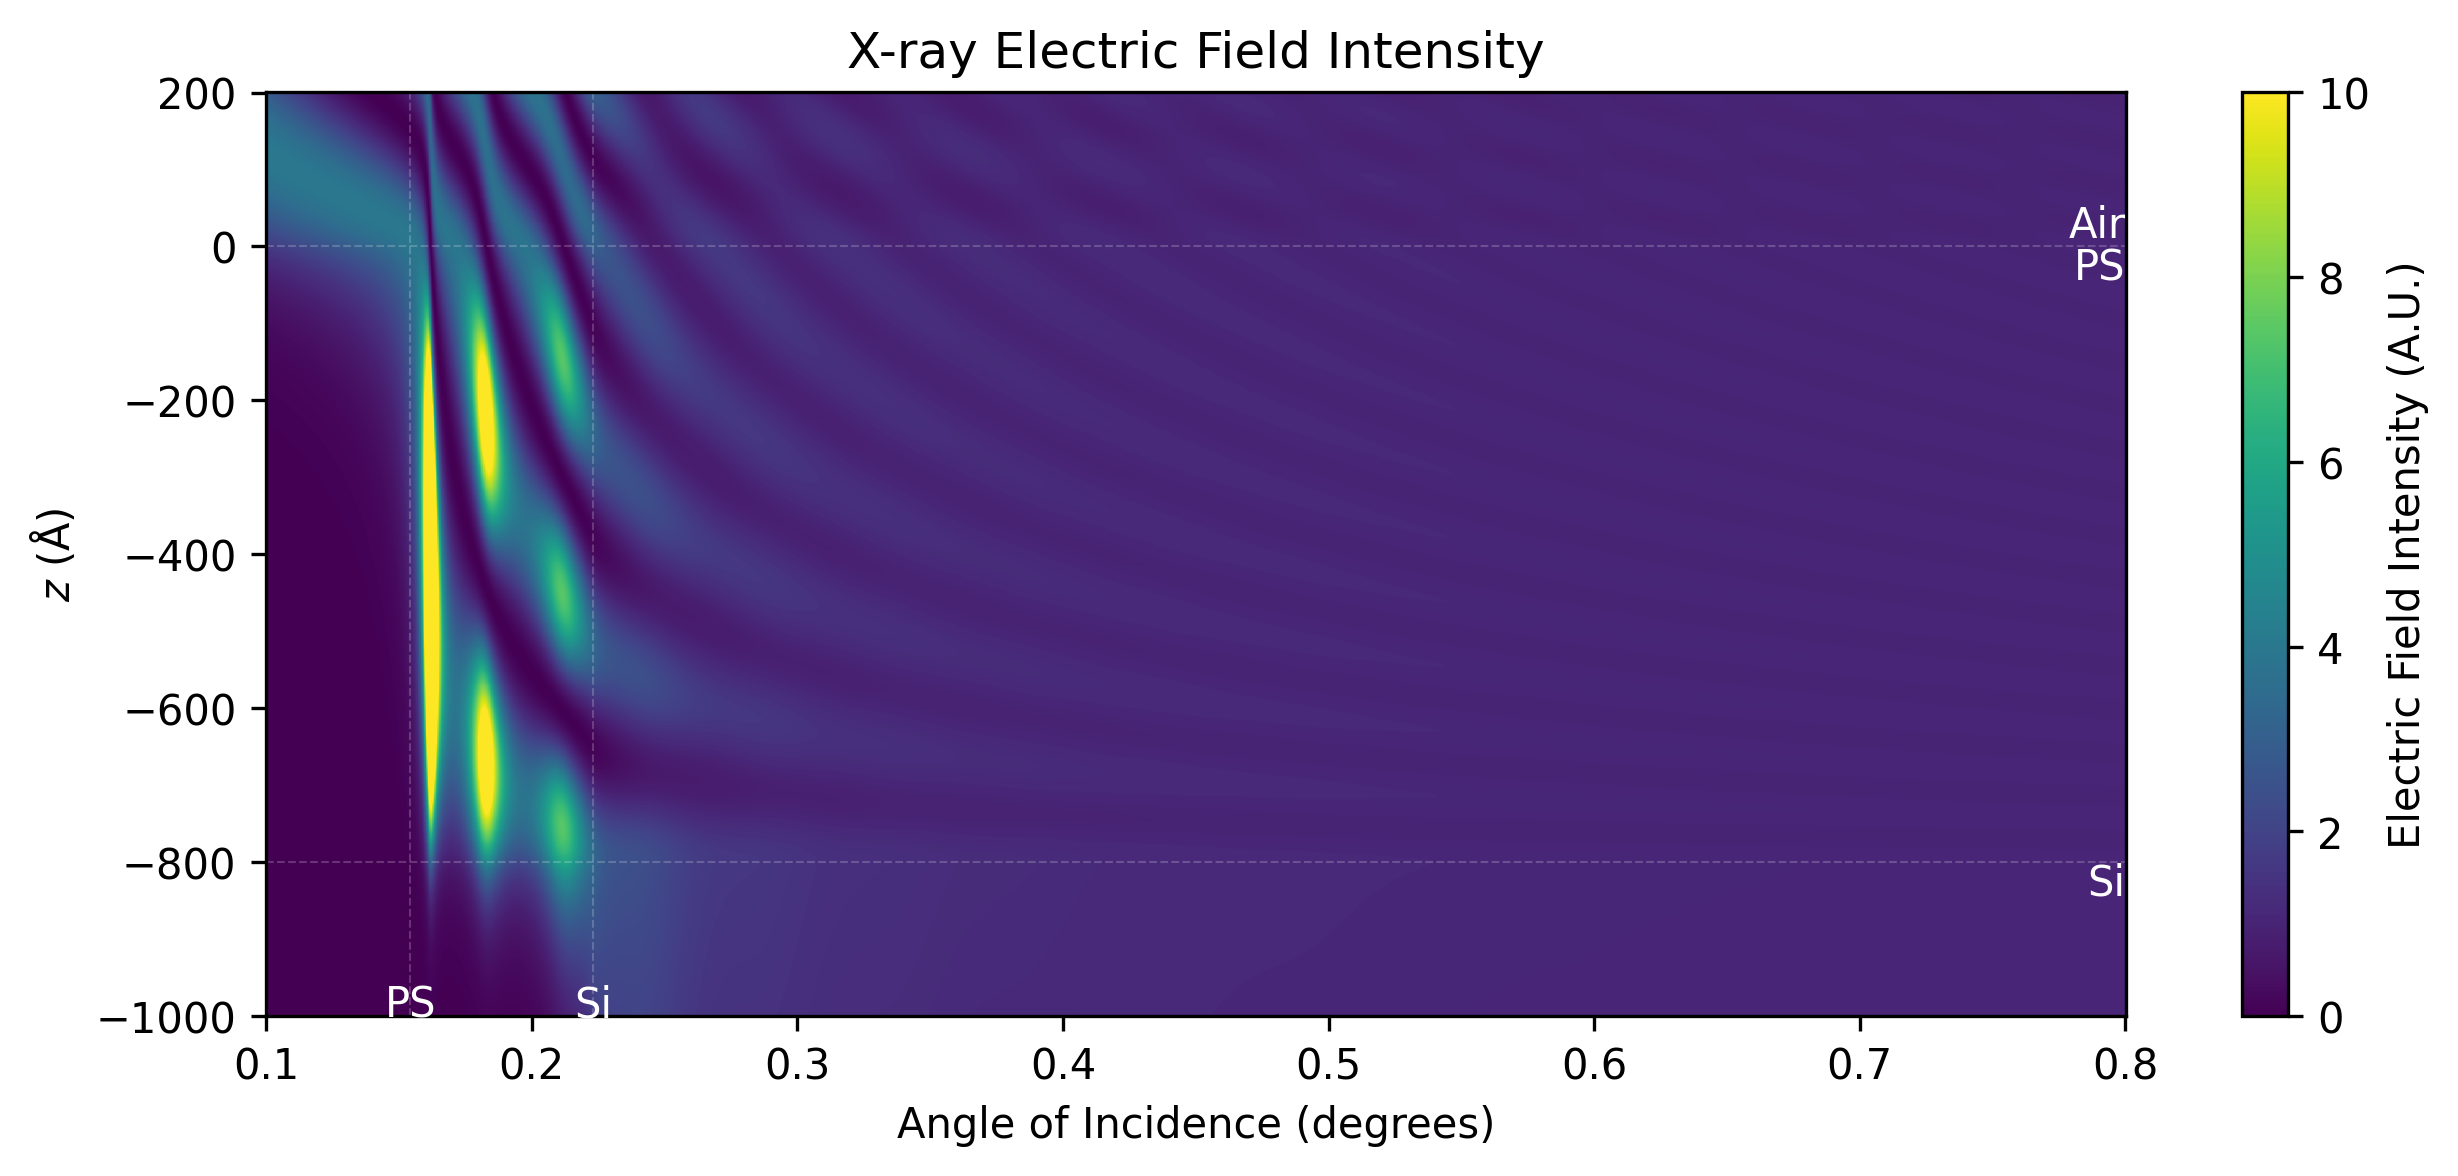

In [13]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig,ax = result3.generate_pretty_figure_XEFI(z_vals, norm=norm)